In [327]:
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interactive, HBox, VBox, Button
from parameter_search import ParameterSearch

<IPython.core.display.Javascript object>


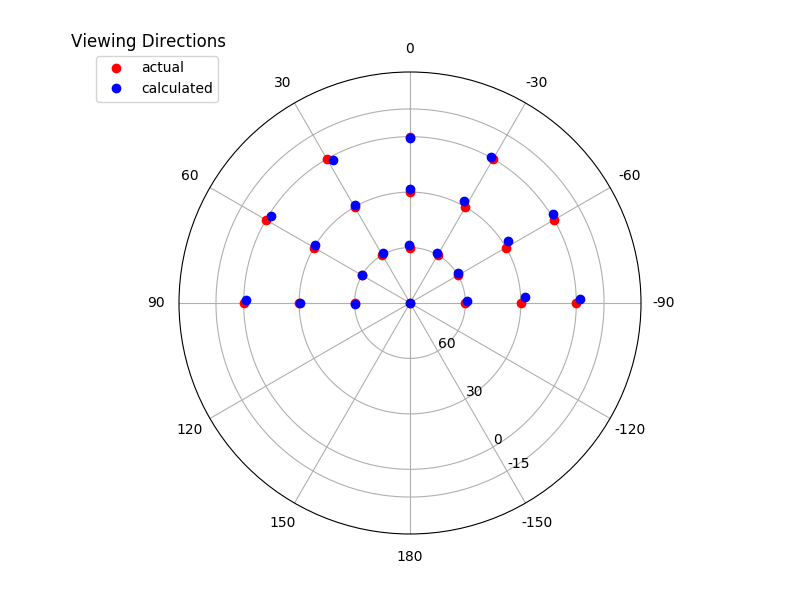

In [328]:
# Update the filename and projector resolution here.
green_dots_filename = "green_dots.txt"
projector_resolution = (1280, 720)

# Enter your best parameter estimates here.
# Searching an 11 dimensional space can be quite difficult.
# The better your estimates, the easier it will be. 
# Take the time to measure the parameters that can be measured easily.
# All distances are in meters, projector_roll and projector_theta are in radians.
# The center of the mirror is the origin of the coordinate system.
parameters = \
{'animal_y':0.0,
'animal_z':0.5,
'dome_y':0.0,
'dome_z':0.3,
'dome_radius':0.7,
'mirror_radius':0.2,
'projector_y':0.9,
'projector_z':0.1,
'projector_roll':0.0,
'projector_theta':0.2,
'projector_vertical_offset':0.1}

def value_to_range(value):
    return (value - 0.2, value + 0.2, 0.001)
ranges = dict([[key, value_to_range(parameters[key])] for key in parameters])

psearch = ParameterSearch(green_dots_filename, *projector_resolution)
sliders = interactive(psearch.update, **ranges)
HBox([VBox(sliders.children[0:4]), VBox(sliders.children[4:8]), VBox(sliders.children[8:])])

In [329]:
def save_parameters(b):
    file = open('initial_parameters.txt', 'w'); file.write(str(sliders.kwargs)); file.close()
button = Button(description = 'Save Initial Parameters')
button.on_click(save_parameters)
display(button)